In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)

import tensorflow as tf
print(tf.__version__)

2.13.0


In [30]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [47]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
1048570,4.0,1.0,0.173611,0.0
1048571,4.0,1.0,0.174306,0.0
1048572,4.0,1.0,0.175000,0.0
1048573,4.0,1.0,0.175694,0.0


In [32]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
y_train

,Przeplyw
408561,0.0
70143,0.0
708782,0.0
572694,0.0
774181,0.0
...,...
259178,0.0
365838,0.0
131932,0.0
671155,0.0


In [34]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(2,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

In [35]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

In [36]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
26215/26215 [==============================] - 156s 6ms/step - loss: 0.7816 - mae: 0.1658
Epoch 2/5
26215/26215 [==============================] - 153s 6ms/step - loss: 0.6970 - mae: 0.1628
Epoch 3/5
26215/26215 [==============================] - 155s 6ms/step - loss: 0.6970 - mae: 0.1628
Epoch 4/5
2621

In [46]:
model.evaluate(x_test, y_test, batch_size=128)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__shard_test_function() missing 2 required positional arguments: 'total_shards' and 'shard_idx'


ZŁA PRÓBA INTERPRETACJI TEMATU

In [42]:
sample_time=1;      #[min]
symulation_time=60; #[min]

current_hours=12;   #[h]
current_minutes=00; #[min]
current_day=1;      #[label, pon-1, wt-2,...,nd-7]

sample_time_normalized=sample_time/(60*24);              #[min - normalized]
symulation_time_normlized=symulation_time/(24*60)           #[min - normalized]
current_time=(current_hours*60+current_minutes)/(24*60)     #[min - normalized]

endtime=current_time+symulation_time_normlized;
if endtime<1:
    flow_time=np.arange(current_time,endtime,sample_time_normalized)                    #[min - normalized]
    flow_time=np.vstack((current_day*np.ones_like(flow_time, dtype=int),flow_time)).T   #[label, min]
else:
    temp_1=np.arange(current_time,1,sample_time_normalized)                             #[min - normalized]
    temp_1=np.vstack((current_day*np.ones_like(temp_1, dtype=int),temp_1)).T            #[label, min]

    temp_2=np.arange(0,endtime-1,sample_time_normalized)                                #[min - normalized]
    temp_2=np.vstack(((current_day+1)*np.ones_like(temp_2, dtype=int),temp_2)).T        #[label, min] 

    flow_time=np.concatenate((temp_1,temp_2))                                           #[label, min]
flow_time


flow_result = model.predict(flow_time)                   # [l/min]
water_usage_predict=np.sum(flow_result)*(sample_time/60) # [l]

print(water_usage_predict)
print(flow_result)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 3ms/step
0.07072477340698242
[[0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 [0.07072]
 

(0.5, 0.55)

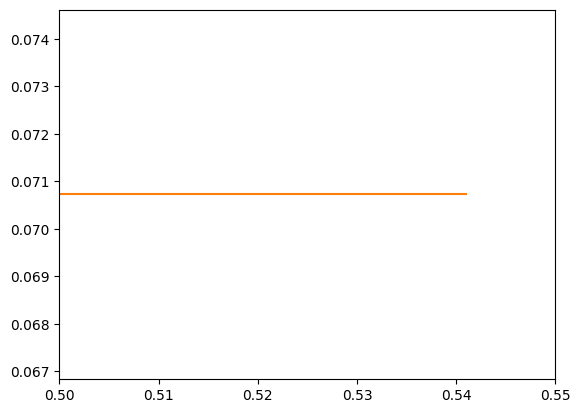

In [43]:
plt.plot(flow_time, flow_result)

plt.xlim(0.5, 0.55)